In [76]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

In [149]:
# Instantiate ticker variable
sp_500 = yf.Ticker("^GSPC")

In [159]:
# Get the historical data for selected ticker
sp_500_df = sp_500.history(period="1d", start="2022-1-1", end="2022-12-31")

# Rename column names
sp_500_df = sp_500_df.rename(columns={"Open":"Daily Open","High":"Daily High","Low":"Daily Low","Close":"Daily Close"})

# Drop columns not used
sp_500_df = sp_500_df.drop(columns=["Stock Splits","Volume","Dividends"])

# Add week number 
sp_500_df["Week Number"] = sp_500_df.index.week

# Add month number
sp_500_df["Month Number"] = sp_500_df.index.month

# Group data on a weekly basis
weekly_data = sp_500_df.groupby(sp_500_df.index.week).mean()

# Add Weekly Open column
sp_500_df.insert(6,'Weekly Open', sp_500_df['Week Number'].map(weekly_data['Daily Open']))

# Add Weekly High column
sp_500_df.insert(7,'Weekly High', sp_500_df['Week Number'].map(weekly_data['Daily High']))

# Add Weekly Low column
sp_500_df.insert(8,'Weekly Low', sp_500_df['Week Number'].map(weekly_data['Daily Low']))

# Add Weekly Close column
sp_500_df.insert(9,'Weekly Close', sp_500_df['Week Number'].map(weekly_data['Daily Close']))


# Add Monthly PIVOT column
weekly_data["Weekly PIVOT"] = (weekly_data["Daily High"] + weekly_data["Daily Low"] + weekly_data["Daily Close"])/3
sp_500_df.insert(10,'Weekly PIVOT', sp_500_df['Week Number'].map(weekly_data['Weekly PIVOT']))

# Group data on a monthly basis
monthly_data = sp_500_df.groupby(sp_500_df.index.month).mean()

# Add Monthly PIVOT column
monthly_data["Monthly PIVOT"] = (monthly_data["Daily High"] + monthly_data["Daily Low"] + monthly_data["Daily Close"])/3
sp_500_df.insert(11,'Monthly PIVOT', sp_500_df['Month Number'].map(monthly_data['Monthly PIVOT']))

# Review top rows from dataframe
sp_500_df.head()

,Daily Open,Daily High,Daily Low,Daily Close,Week Number,Month Number,Weekly Open,Weekly High,Weekly Low,Weekly Close,Weekly PIVOT,Monthly PIVOT
Date,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,4778.140137,4796.640137,4758.169922,4796.560059,1,1,4752.338086,4769.184082,4713.175977,4732.751953,4738.370671,4573.811165
2022-01-04 00:00:00-05:00,4804.509766,4818.620117,4774.270020,4793.540039,1,1,4752.338086,4769.184082,4713.175977,4732.751953,4738.370671,4573.811165
2022-01-05 00:00:00-05:00,4787.990234,4797.700195,4699.439941,4700.580078,1,1,4752.338086,4769.184082,4713.175977,4732.751953,4738.370671,4573.811165
2022-01-06 00:00:00-05:00,4693.390137,4725.009766,4671.259766,4696.049805,1,1,4752.338086,4769.184082,4713.175977,4732.751953,4738.370671,4573.811165
2022-01-07 00:00:00-05:00,4697.660156,4707.950195,4662.740234,4677.029785,1,1,4752.338086,4769.184082,4713.175977,4732.751953,4738.370671,4573.811165


In [163]:
# Add Weekly Resistance 1 Column
sp_500_df["WR1"] = (2 * sp_500_df["Weekly PIVOT"]) - sp_500_df["Weekly Low"]

# Add Weekly Resistance 2 Column
sp_500_df["WR2"] = sp_500_df["Weekly PIVOT"] + (sp_500_df["Weekly High"] - sp_500_df["Weekly Low"])

# Add Weekly Resistance 3 Column
sp_500_df["WR3"] = sp_500_df["WR1"] + (sp_500_df["Weekly High"] - sp_500_df["Weekly Low"])

# Add Weekly Support 1 Column
sp_500_df["SR1"] = (2 * sp_500_df["Weekly PIVOT"]) - sp_500_df["Weekly High"]

# Add Weekly Support 2 Column
sp_500_df["SR2"] = sp_500_df["Weekly PIVOT"] - (sp_500_df["Weekly High"] - sp_500_df["Weekly Low"])

# Add Weekly Support 3 Column
sp_500_df["SR3"] = sp_500_df["SR1"] - (sp_500_df["Weekly High"] - sp_500_df["Weekly Low"])

# Add Simple Moving Average 20 Column
sp_500_df["SMA20"] = sp_500_df["Daily Close"].rolling(window=20).mean()

# Add Simple Moving Average 79 Column
sp_500_df["SMA79"] = sp_500_df["Daily Close"].rolling(window=79).mean()

# Add Exponential Moving Average 20 Column
sp_500_df["EMA20"] = sp_500_df["Daily Close"].ewm(halflife=20).mean()

# Add Exponential Moving Average 89 Column
sp_500_df["EMA89"] = sp_500_df["Daily Close"].ewm(halflife=89).mean()

# Range
sp_500_df["Range"] = sp_500_df["Daily High"] - sp_500_df["Daily Low"]

# ATR
sp_500_df["ATR"] = sp_500_df["Range"].rolling(window=20).mean()

# Kertnel Upper Band
sp_500_df["Kertnel Upper"] = sp_500_df["EMA20"] + (2*sp_500_df["ATR"])

# Kertnel Lower Band
sp_500_df["Kertnel Lower"] = sp_500_df["EMA20"] - (2*sp_500_df["ATR"])

# Drop null values
sp_500_df = sp_500_df.dropna()

# Review top rows from dataframe
sp_500_df.head()

,Daily Open,Daily High,Daily Low,Daily Close,Week Number,Month Number,Weekly Open,Weekly High,Weekly Low,Weekly Close,...,SR2,SR3,SMA20,SMA79,EMA20,EMA89,Range,ATR,Kertnel Upper,Kertnel Lower
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-26 00:00:00-04:00,4278.140137,4278.140137,4175.040039,4175.200195,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4112.625814,4054.917741,4449.349512,4455.462903,4423.329534,4445.275320,103.100098,69.324048,4561.977630,4284.681438
2022-04-27 00:00:00-04:00,4186.520020,4240.709961,4162.899902,4183.959961,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4112.625814,4054.917741,4426.967505,4447.708471,4414.632140,4440.903350,77.810059,70.832568,4556.297277,4272.967004
2022-04-28 00:00:00-04:00,4222.580078,4308.450195,4188.629883,4287.500000,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4112.625814,4054.917741,4411.219995,4441.302901,4410.023313,4438.359640,119.820312,74.501074,4559.025462,4261.021165
2022-04-29 00:00:00-04:00,4253.750000,4269.680176,4124.279785,4131.930176,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4112.625814,4054.917741,4391.295996,4434.104801,4399.963826,4433.322917,145.400391,78.138110,4556.240046,4243.687605
2022-05-02 00:00:00-04:00,4130.609863,4169.810059,4062.510010,4155.379883,18,5,4174.033984,4221.138086,4106.483984,4180.247949,...,4054.635905,4002.787826,4371.771997,4427.260878,4391.135092,4428.793730,107.300049,81.446594,4554.028281,4228.241904


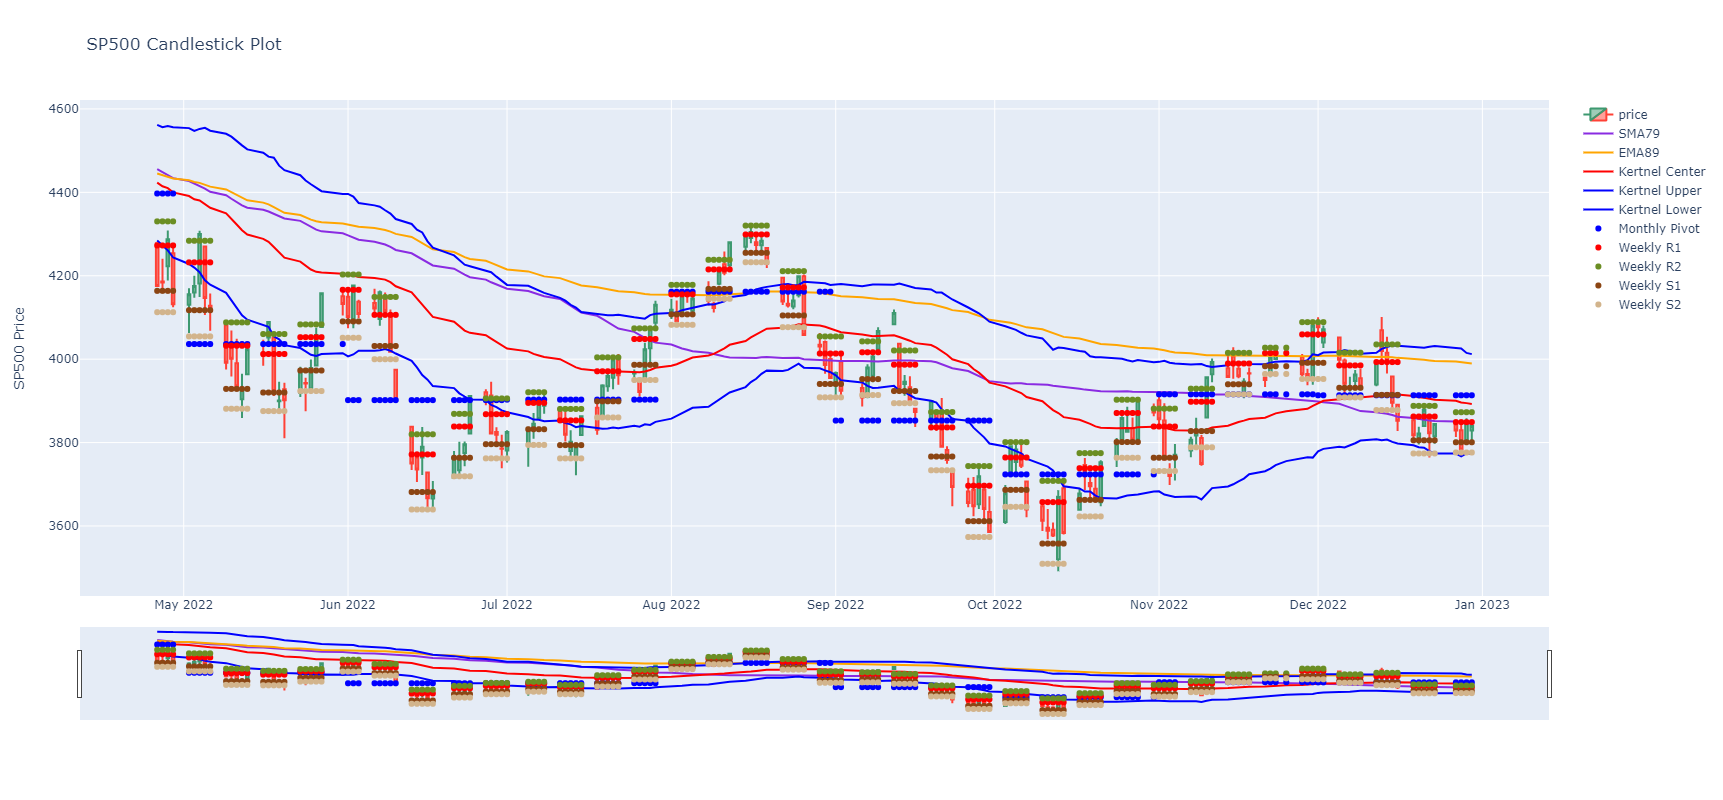

In [167]:
# Build candlestick plot
fig = go.Figure(data=[
                go.Candlestick(
                    x=sp_500_df.index,
                    open=sp_500_df['Daily Open'],
                    high=sp_500_df['Daily High'],
                    low=sp_500_df['Daily Low'],
                    close=sp_500_df['Daily Close']
                ),
                     
                # SMA79
                go.Line(
                    x=sp_500_df.index,
                    y=sp_500_df["SMA79"],
                    line_color="rgb(138,43,226)"
               ),
    
                # EMA79
                go.Line(
                    x=sp_500_df.index,
                    y=sp_500_df["EMA89"],
                    line_color="rgb(255,165,0)"
               ),
        
                # EMA (Kertnel Center)
                go.Line(
                    x=sp_500_df.index,
                    y=sp_500_df["EMA20"],
                    line_color='rgb(255,0,0)'
               ),
    
                # Kertnel Upper
                go.Line(
                    x=sp_500_df.index,
                    y=sp_500_df["Kertnel Upper"],
                    line_color='rgb(0,0,255)'
            
               ),
    
                # Kertnel Lower
                go.Line(
                    x=sp_500_df.index,
                    y=sp_500_df["Kertnel Lower"],
                    line_color='rgb(0,0,255)'
               ),
    
                # Monthly Pivot
                go.Scatter(
                    x=sp_500_df.index,
                    y=sp_500_df["Monthly PIVOT"],
                    mode='markers',
                    marker_color='rgb(0,0,255)'
                ),
    
                # Weekly R1
                go.Scatter(
                    x=sp_500_df.index,
                    y=sp_500_df["WR1"],
                    mode='markers',
                    marker_color='rgb(255,0,0)'
                ),
    
                # Weekly R2
                go.Scatter(
                    x=sp_500_df.index,
                    y=sp_500_df["WR2"],
                    mode='markers',
                    marker_color='rgb(107,142,35)'
                ),
    
                # Weekly S1
                go.Scatter(
                    x=sp_500_df.index,
                    y=sp_500_df["SR1"],
                    mode='markers',
                    marker_color='rgb(139,69,19)'
                ),
    
                # Weekly S2
                go.Scatter(
                    x=sp_500_df.index,
                    y=sp_500_df["SR2"],
                    mode='markers',
                    marker_color='rgb(210,180,140)'
                ),
    
                ]
            )

def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name
        
custom_legend_name(['price','SMA79','EMA89','Kertnel Center','Kertnel Upper','Kertnel Lower','Monthly Pivot','Weekly R1','Weekly R2','Weekly S1','Weekly S2'])

fig.update_layout(
    title='SP500 Candlestick Plot',
    yaxis_title='SP500 Price',
)

fig.update_layout(autosize=False, width=1600, height=800)
fig.show()

In [168]:
# Create an empty list containing the price patters (bullish, bearish, neutral)
price_patterns = [0]

for i in range(len(sp_500_df)-1):
    
    # BULLISH PRICE PATTERNS
    
    # 1. Bullish "Quasi" Engulfing Pattern
    if (sp_500_df.iloc[i+1]["Daily Open"] <= sp_500_df.iloc[i]["Daily Close"] and sp_500_df.iloc[i+1]["Daily Close"] >= sp_500_df.iloc[i]["Daily Open"] and sp_500_df.iloc[i+1]["Daily High"] > sp_500_df.iloc[i]["Daily High"] and sp_500_df.iloc[i+1]["Daily Low"] < sp_500_df.iloc[i]["Daily Low"]):
        price_patterns.append(1)
        
    # 2. "Neutral" Harami (at Support)
    elif (sp_500_df.iloc[i]["Daily Close"] < sp_500_df.iloc[i]["Daily Open"] and sp_500_df.iloc[i+1]["Daily Close"] == sp_500_df.iloc[i+1]["Daily Open"]):
        price_patterns.append(1)
        
    # 3. Double Candlestick LOW w/ higher HIGH and HIGH CLOSE
    elif (sp_500_df.iloc[i+1]["Daily Low"] == sp_500_df.iloc[i]["Daily Low"] and sp_500_df.iloc[i+1]["Daily Close"] > sp_500_df.iloc[i]["Daily Close"] and sp_500_df.iloc[i+1]["Daily High"] > sp_500_df.iloc[i]["Daily High"]):
        price_patterns.append(1)
    
    # BEARISH PRICE PATTENRS
    
    # 1. Bearish "Quasi" Engulfing Pattern
    elif (sp_500_df.iloc[i+1]["Daily Open"] >= sp_500_df.iloc[i]["Daily Close"] and sp_500_df.iloc[i+1]["Daily Close"] <= sp_500_df.iloc[i]["Daily Open"] and sp_500_df.iloc[i+1]["Daily High"] > sp_500_df.iloc[i]["Daily High"] and sp_500_df.iloc[i+1]["Daily Low"] < sp_500_df.iloc[i]["Daily Low"]):
        price_patterns.append(-1)
        
    # 2. "Neutral" Harami (at Support)
    elif (sp_500_df.iloc[i]["Daily Close"] > sp_500_df.iloc[i]["Daily Open"] and sp_500_df.iloc[i+1]["Daily Close"] == sp_500_df.iloc[i+1]["Daily Open"]):
        price_patterns.append(-1)
        
    # 3. Double Candlestick HIGH w/ Lower LOW and Lower CLOSE
    elif (sp_500_df.iloc[i+1]["Daily High"] == sp_500_df.iloc[i]["Daily High"] and sp_500_df.iloc[i+1]["Daily Close"] < sp_500_df.iloc[i]["Daily Close"] and sp_500_df.iloc[i+1]["Daily Low"] < sp_500_df.iloc[i]["Daily Low"]):
        price_patterns.append(-1)
    
    # NEUTRAL
    else:
        price_patterns.append(0)

In [169]:
# Add Strategy column to our dataframe
sp_500_df["Strategy"] = price_patterns

# Review top rows from dataframe
sp_500_df.head()

,Daily Open,Daily High,Daily Low,Daily Close,Week Number,Month Number,Weekly Open,Weekly High,Weekly Low,Weekly Close,...,SR3,SMA20,SMA79,EMA20,EMA89,Range,ATR,Kertnel Upper,Kertnel Lower,Strategy
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-26 00:00:00-04:00,4278.140137,4278.140137,4175.040039,4175.200195,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4054.917741,4449.349512,4455.462903,4423.329534,4445.275320,103.100098,69.324048,4561.977630,4284.681438,0
2022-04-27 00:00:00-04:00,4186.520020,4240.709961,4162.899902,4183.959961,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4054.917741,4426.967505,4447.708471,4414.632140,4440.903350,77.810059,70.832568,4556.297277,4272.967004,0
2022-04-28 00:00:00-04:00,4222.580078,4308.450195,4188.629883,4287.500000,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4054.917741,4411.219995,4441.302901,4410.023313,4438.359640,119.820312,74.501074,4559.025462,4261.021165,0
2022-04-29 00:00:00-04:00,4253.750000,4269.680176,4124.279785,4131.930176,17,4,4239.266016,4279.200098,4170.333887,4214.942090,...,4054.917741,4391.295996,4434.104801,4399.963826,4433.322917,145.400391,78.138110,4556.240046,4243.687605,0
2022-05-02 00:00:00-04:00,4130.609863,4169.810059,4062.510010,4155.379883,18,5,4174.033984,4221.138086,4106.483984,4180.247949,...,4002.787826,4371.771997,4427.260878,4391.135092,4428.793730,107.300049,81.446594,4554.028281,4228.241904,0


In [170]:
# TODO: add the strategy criteria based on resistance and support boundaries